## Zomato Data Analysis Project

1. Import necessary libraries for data manipulation, mathematical operations, and data visualization

In [2]:
import pandas as pd  # type: ignore # Library for data manipulation and analysis
import numpy as np   # type: ignore # Library for efficient numerical computation
import matplotlib.pyplot as plt  # type: ignore # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # type: ignore # Library for creating informative and attractive statistical graphics

2. Creating Dataframe

In [3]:
df = pd.read_csv("Zomato data .csv") 

In [4]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Data Cleaning

Convert the Data type of Column - "rate"

In [6]:
# Define a function to convert the 'rate' column values to float
def handleRate(value):
    # Convert the value to a string, in case it's not already
    value = str(value)
    
    # Split the value by the "/" character, in case it's a fraction
    value = value.split("/")
    
    # Take the first part of the split value (before the "/")
    value = value[0]
    
    # Convert the value to a float
    return float(value)

# Apply the handleRate function to each value in the 'rate' column of the DataFrame
df['rate'] = df['rate'].apply(handleRate)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Q1. What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type of Restaurants')

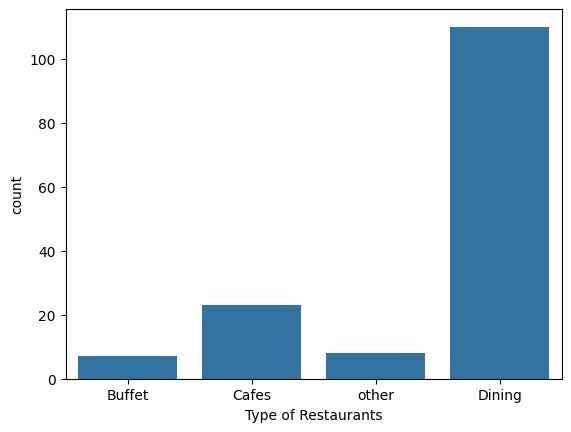

In [8]:
# Create a count plot using seaborn to visualize the distribution of restaurant types
sns.countplot(x= df["listed_in(type)"])

# Add a label to the x-axis to describe what the plot is showing
plt.xlabel("Type of Restaurants")


Ans: So Majority of Dinning Restorants Customers order from.

# Q2. How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

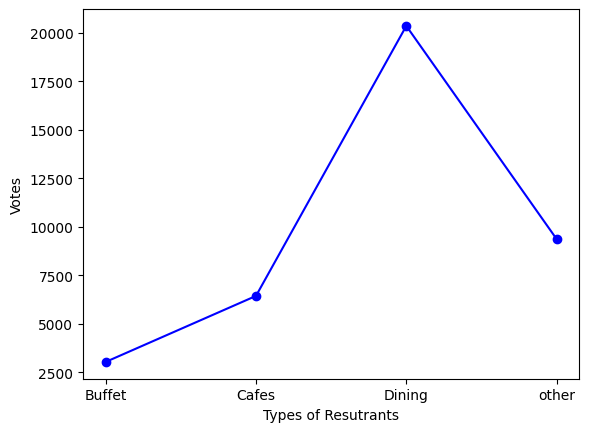

In [9]:
# Group the data by 'listed_in(type)' and sum the 'votes'
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Create a new DataFrame with the result
result = pd.DataFrame({'votes': grouped_data})

# Plot the result
plt.plot(result , c = 'blue' , marker ='o')
plt.xlabel('Types of Resutrants')
plt.ylabel('Votes')

Ans: Dinning resturants Recieved Maximum Votes

# Q3. What are the ratings that the majority of restaurants have received?

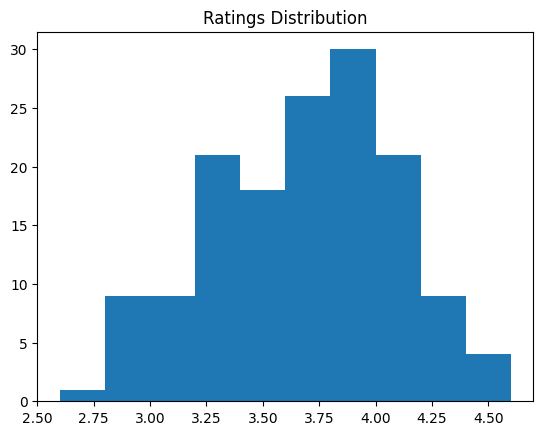

In [10]:
# Import the matplotlib.pyplot module (not shown in your code snippet, but assumed)
import matplotlib.pyplot as plt # type: ignore

# Create a histogram of the 'rate' column in the dataframe 'df'
# with 5 bins
plt.hist(df['rate'], bins=10) 

# Set the title of the histogram
plt.title("Ratings Distribution")

# Display the histogram
plt.show()

Ans: The majority of restaurants received ratings ranging from 3.5 to 4.

# Q4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

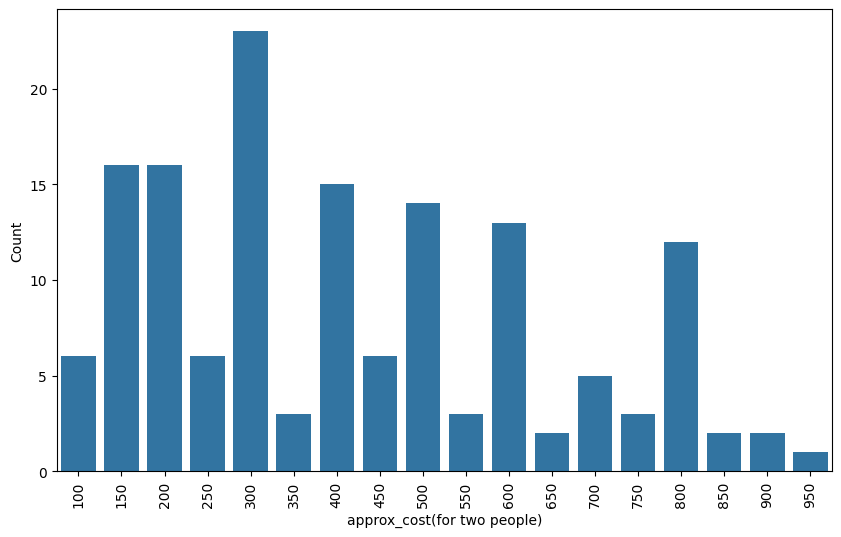

In [32]:
couple_data = df['approx_cost(for two people)']

# Create a countplot of the 'couple_data' using seaborn's countplot function
plt.figure(figsize=(10,6))
sns.countplot(x = couple_data)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Ans: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

# Q5. Which mode (online or offline) has received the maximum rating?

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_16196\3587141247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df, showmeans=True, showfliers=False, palette='Set3')


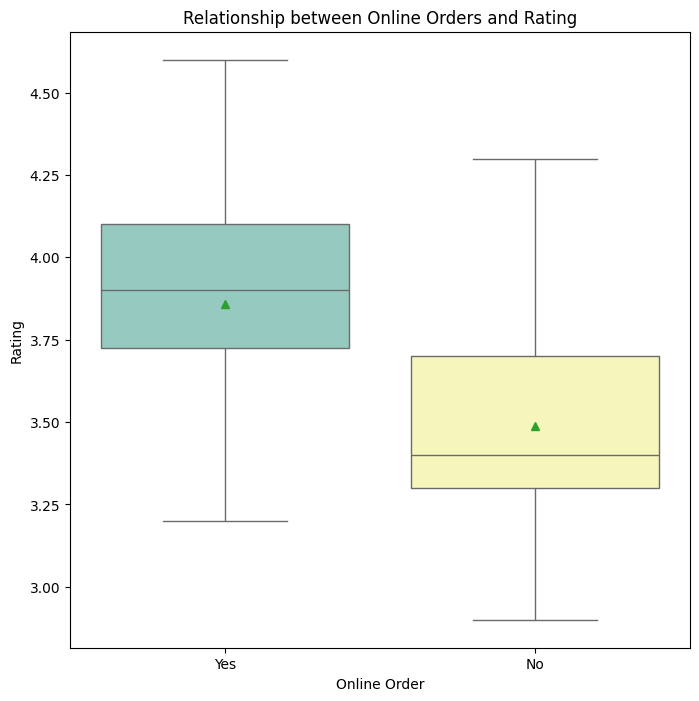

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(x='online_order', y='rate', data=df, showmeans=True, showfliers=False, palette='Set3')
plt.title('Relationship between Online Orders and Rating')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()

Ans: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

# Q6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


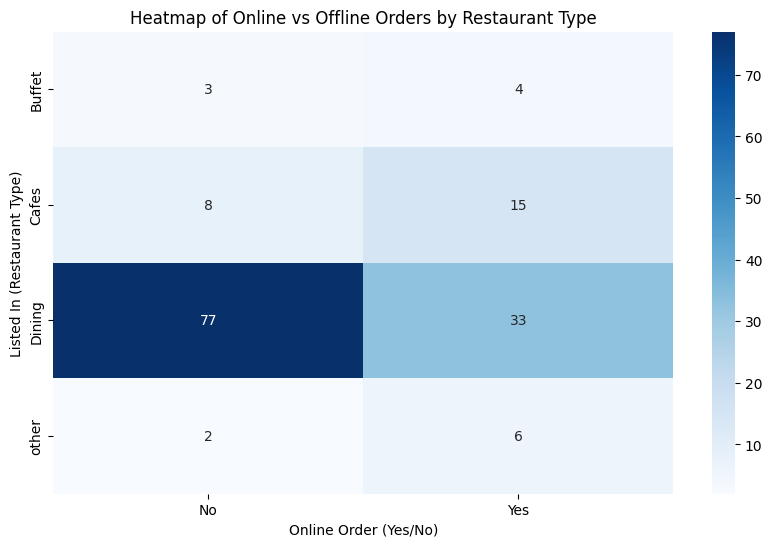

In [22]:
# Create a pivot table to analyze the relationship between restaurant types and online orders
# The pivot table will have restaurant types as the index and online order status as the columns
# The aggfunc='size' parameter counts the number of occurrences for each combination of restaurant type and online order status
# The fill_value=0 parameter replaces missing values with 0
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Create a new figure with a specified size for the heatmap
plt.figure(figsize=(10,6))  

# Generate a heatmap from the pivot table
# The annot=True parameter displays the count values on the heatmap
# The fmt="d" parameter formats the count values as integers
# The cmap="Blues" parameter sets the color scheme of the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")

# Set the title of the heatmap
plt.title("Heatmap of Online vs Offline Orders by Restaurant Type")

# Set the labels for the x and y axes
plt.xlabel("Online Order (Yes/No)")
plt.ylabel("Listed In (Restaurant Type)")

# Display the heatmap
plt.show()

Ans: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.